# Sales Prediction 

### importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading The Data

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### checking for Null Values

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### Heatmap

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

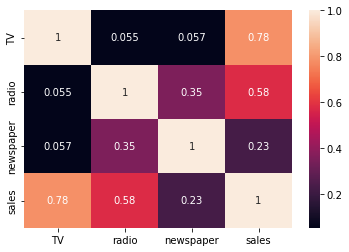

In [9]:
sns.heatmap(df.corr(),annot=True)

# Exploratory Data Analysis

In [10]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="sales",data=df,color="purple")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

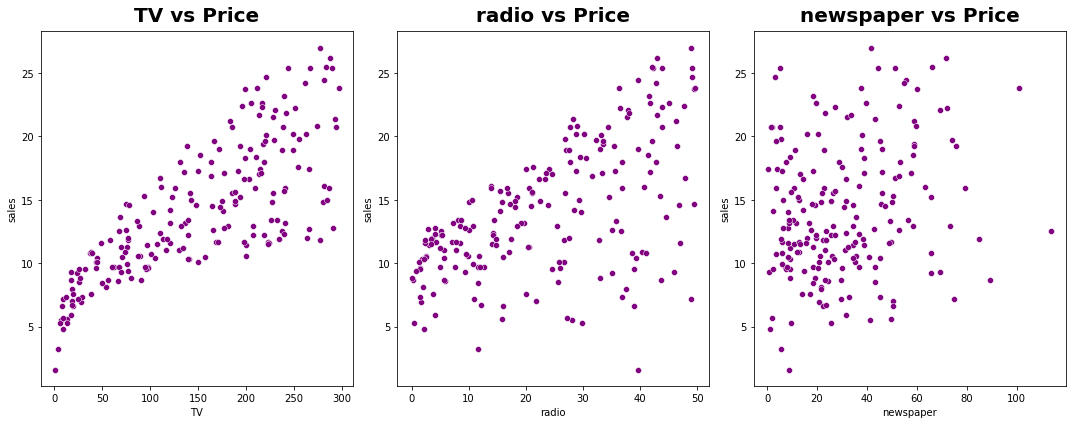

In [11]:
scatter_plot(['TV','radio','newspaper'])

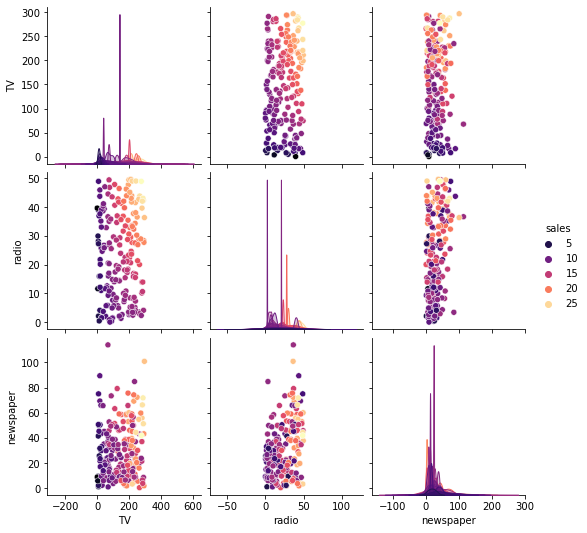

In [12]:
sns.pairplot(df,hue='sales',palette='magma')
plt.legend([],[],frameon=False)

### Regressor Lines

Text(0.5, 1.0, 'The Regression Line Of ad Newspaper Vs Sales')

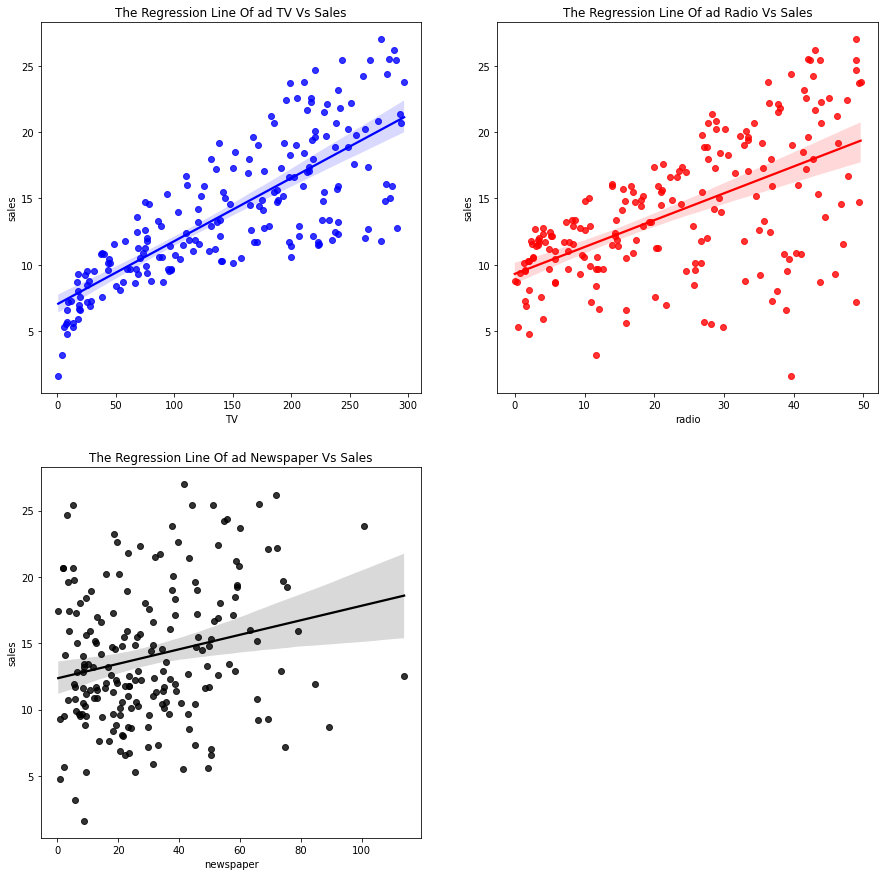

In [32]:
plt.figure(figsize =(15,15))
plt.subplot(2,2,1)
sns.regplot(data=df,x='TV',y='sales',color='b').set_title('The Regression Line Of ad TV Vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=df,x='radio',y='sales',color='r').set_title('The Regression Line Of ad Radio Vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=df,x='newspaper',y='sales',color='k').set_title('The Regression Line Of ad Newspaper Vs Sales')

### Splitting the data 

In [14]:
X=df.drop('sales',axis=1)
y=df['sales']

# Importing Scikit Learn Libraries

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

###  Train|Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

### Fitting the model

In [17]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [18]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [20]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

# Performance of Data

In [21]:
MAE=[]
RMSE=[]

In [22]:
def predictions(model):
    pred=model.predict(X_test)
    mae=mean_absolute_error(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('MAE:',mean_absolute_error(y_test,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
    MAE.append(mae)
    RMSE.append(rmse)

In [23]:
predictions(lr_model)

MAE: 1.129149489728572
RMSE: 1.443869808034338


In [24]:
predictions(rfr)

MAE: 0.5992749999999963
RMSE: 0.740364251568101


In [25]:
predictions(svr)

MAE: 1.6677789375283392
RMSE: 2.2088492503186576


In [26]:
predictions(knn)

MAE: 1.4700000000000002
RMSE: 1.9303937422194468


### Dataframe of Metrics

In [27]:
pd.DataFrame({'Models':['Linear Regressor','Random Forest Regressor','Support Vector Regressor','KNearestneighbour'],
             'MAE':MAE,
             'RMSE':RMSE})

,Models,MAE,RMSE
0,Linear Regressor,1.129149,1.443870
1,Random Forest Regressor,0.599275,0.740364
2,Support Vector Regressor,1.667779,2.208849
3,KNearestneighbour,1.470000,1.930394


### By observing above DataFrame wecan conclude that "Random Forest  Regressor" is performing well.so we can select that for prediction

# Final Model 

In [28]:
final_model=RandomForestRegressor()
final_model.fit(X,y)

RandomForestRegressor()

# Predicting on New Data

In [29]:
new_data=[[177.0,9.3,6.4]]
final_model.predict(new_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([12.792])